# Bimodal distribution (mixture of two 1d Gaussians)

In [1]:
try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns

try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt

try:
    import scipy
except:
    %pip install scipy
    import scipy
from scipy.stats import norm

try:
    import jax
except:
    %pip install jax jaxlib
    import jax

import jax.numpy as jnp

In [2]:
import os

LATEXIFY = "LATEXIFY" in os.environ

if LATEXIFY:
    import sys

    sys.path.append("scripts")
    from plot_utils import latexify, savefig

    latexify(width_scale_factor=1.2, fig_height=1.5)

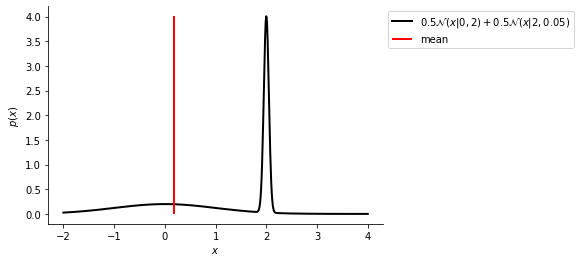

In [3]:
# Define two normal distrubutions and their corresponding weights.
LINE_WIDTH = 2
mu = [0, 2]
sigma = [1, 0.05]
distributions = [norm(loc=mu[i], scale=sigma[i]) for i in range(2)]
weights = [0.5, 0.5]

# Define a set of x points for graphing.
x = jnp.linspace(-2, 2 * mu[1], 600)

# Combine the two distributions by their weights, evaluated at the x points.
p = sum(weights[i] * distributions[i].pdf(x) for i in range(2))

# Calculate the mean of the final distribution.
mean_p = jnp.mean(x * p)

# Plot the final distribution and its mean.
p = sum(weights[i] * distributions[i].pdf(x) for i in range(2))
plt.plot(
    x,
    p,
    "black",
    linewidth=LINE_WIDTH,
    label="$0.5\mathcal{N}(x|0,2) + 0.5\mathcal{N}(x|2,0.05)$",
)

plt.vlines(mean_p, ymin=0, ymax=max(p), color="red", linewidth=LINE_WIDTH, label="mean")

plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.legend(bbox_to_anchor=(1, 1))

# format axes
sns.despine()

if LATEXIFY:
    savefig("bimodalSpike_latexified.pdf");

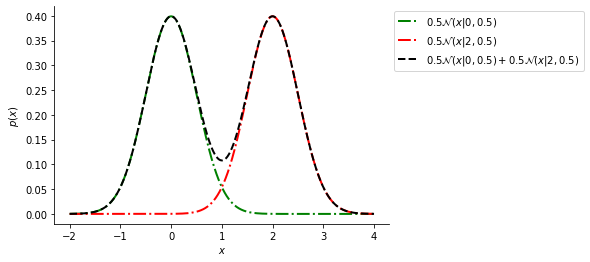

In [3]:
# Another example, with two modes
def make_graph(ax, data, color=None, linestyle=None, label=None, xlabel=None, ylabel=None):

    LINE_WIDTH = 2

    x = data["x"]
    weights = data["weights"]
    distributions = data["distributions"]
    p = sum(weights[i] * distributions[i].pdf(x) for i in range(len(distributions)))

    ax.plot(
        x,
        p,
        color=color,
        linestyle=linestyle,
        linewidth=LINE_WIDTH,
        label=label,
    )
    plt.legend(bbox_to_anchor=(1, 1))
    if xlabel:
        plt.xlabel("$x$")
    if ylabel:
        plt.ylabel("$p(x)$")


# data for both distributions
data = dict()
mu = [0, 2]
sigma = [0.5, 0.5]
weights = [0.5, 0.5]
data = {
    "distributions": [norm(loc=mu[i], scale=sigma[i]) for i in range(2)],
    "weights": weights,
    "x": jnp.linspace(-2, 2 * mu[1], 600),
}

# plot first distribution
plt.figure()
ax = plt.gca()


mu = [0]
sigma = [0.5]
data1 = {
    "distributions": [norm(loc=mu[i], scale=sigma[i]) for i in range(1)],
    "weights": [data["weights"][0]],
    "x": data["x"],
}
make_graph(ax, data1, color="g", linestyle="dashdot", label="$0.5\mathcal{N}(x|0,0.5)$")

# plot second distribution
data2 = dict()
mu = [2]
sigma = [0.5]
data2 = {
    "distributions": [norm(loc=mu[i], scale=sigma[i]) for i in range(1)],
    "weights": [data["weights"][0]],
    "x": data["x"],
}
make_graph(ax, data2, color="r", linestyle="dashdot", label="$0.5\mathcal{N}(x|2,0.5)$")

# Plot First distribution + Second distribution
make_graph(
    ax,
    data,
    color="k",
    linestyle="dashed",
    label="$0.5\mathcal{N}(x|0,0.5) + 0.5\mathcal{N}(x|2,0.5)$",
    xlabel="$x$",
    ylabel="$p(x)$",
)

# format axes
sns.despine()
if LATEXIFY:
    savefig("bimodalDistribution_latexified.pdf")